In [3]:
import numpy as np
import pandas as pd
from plotnine import *
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import statsmodels.formula.api as smf

In [4]:
#I have written several functions to do the analysis.

In [5]:
final_table = pd.read_csv('2.0_ultimate_final_frame.csv')

In [6]:
def Frame_Preparation(state, control_states, response, policy_change_year):
    #This function does the initial preparation of the frames and variables for analysis of the states
    #separate out into State and control frames
    control_state_frame = final_table.loc[(final_table['State'] == control_states[0]) | (final_table['State'] == control_states[1]) | (final_table['State'] == control_states[2])]
    response_state_frame = final_table.loc[final_table['State'] == state]
    
    #Pool by average of the counties
    control_pooled = control_state_frame.groupby('Year').mean()
    response_state_pooled = response_state_frame.groupby('Year').mean()
    control_pooled.reset_index(inplace = True)
    response_state_pooled.reset_index(inplace = True)
    
    #figure out policy change year
    pc_year = policy_change_year
    pc_year_minus_1 = pc_year -1
    
    #Calculate years from policy change
    control_pooled['Years_From_Policy_Change'] = control_pooled['Year'] - pc_year
    response_state_pooled['Years_From_Policy_Change'] = response_state_pooled['Year'] - pc_year
    
    return control_pooled, response_state_pooled, pc_year, pc_year_minus_1

In [10]:
def diff_in_diff(state, control_states, response, policy_change_year):
    #this function should give the diff_in_diff graph based on the state wanted
    #the control states as a list
    #the response column requested
    #and the policy change year
    
    control_pooled, response_state_pooled, pc_year, pc_year_minus_1 = Frame_Preparation(state, control_states, response, policy_change_year)
    
    plt.figure(figsize=(10,6))
    sns.lineplot(response_state_pooled[response_state_pooled['Year']<=pc_year_minus_1]['Years_From_Policy_Change'],response_state_pooled[response],color="green",label = state)
    sns.lineplot(response_state_pooled[response_state_pooled['Year']>pc_year_minus_1]['Years_From_Policy_Change'],response_state_pooled[response],color="green")
    sns.lineplot(control_pooled[control_pooled['Year']<=pc_year_minus_1]['Years_From_Policy_Change'],control_pooled[response],color="blue",label = 'Controls')
    sns.lineplot(control_pooled[control_pooled['Year']>pc_year_minus_1]['Years_From_Policy_Change'], control_pooled[response],color="blue")
    plt.axvline(x=0,linestyle = '-.',color = 'black')
    plt.xlabel("Years from Policy Change",fontsize = 12)
    plt.ylabel(response,fontsize = 12)
    plt.title("Difference in Difference Model Between " + state +' and Control States ' + control_states[0] + ', ' + control_states[1] + ' and ' + control_states[2],fontsize = 16)
    plt.show()

In [11]:
def Pre_Post(state, control_states, response, policy_change_year):
    #This function will give the pre post analysis graph based on the response state (string) (two letter state form)
    #a list of control states strings, in two letter form (ex. ['GA', 'FL', 'AL'])
    #the reponse variable column as astring
    #and the policy change year as an integer
    
    control_pooled, response_state_pooled, pc_year, pc_year_minus_1 = Frame_Preparation(state, control_states, response, policy_change_year)
    
    plt.figure(figsize=(10,6))
    sns.lineplot(response_state_pooled[response_state_pooled['Year']<=pc_year_minus_1]['Years_From_Policy_Change'],response_state_pooled[response],color="green",label = 'pre')
    sns.lineplot(response_state_pooled[response_state_pooled['Year']>pc_year_minus_1]['Years_From_Policy_Change'],response_state_pooled[response],color="blue",label = 'post')
    plt.axvline(x=0,linestyle = '-.',color = 'black')
    plt.xlabel("Years from Policy Change",fontsize = 12)
    plt.ylabel(response,fontsize = 12)
    plt.title("Pre-Post Model Graph for " + state,fontsize = 16)
    plt.show()

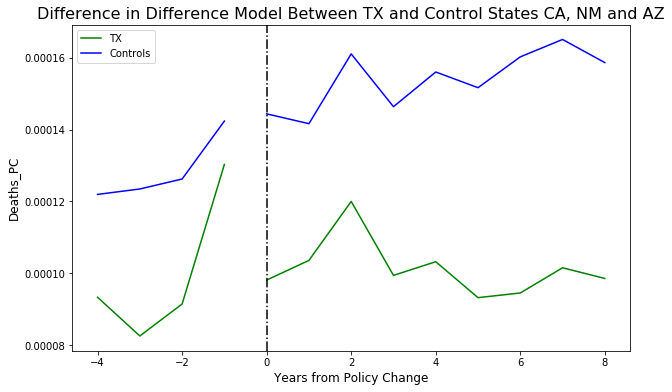

In [12]:
#Test if it works
diff_in_diff('TX', ['CA','NM','AZ'], 'Deaths_PC', 2007)

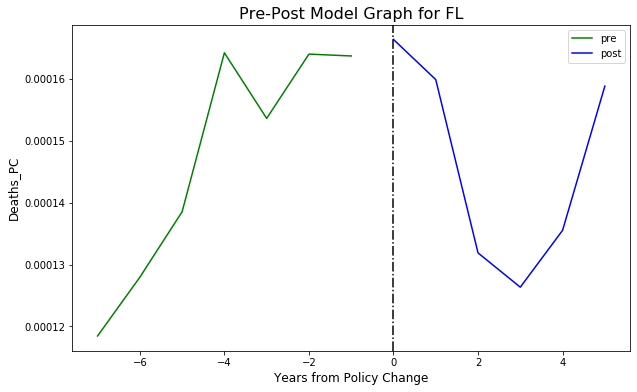

In [9]:
#Test if pre_post works
Pre_Post('FL', ['GA','AL','NC'], 'Deaths_PC', 2010)